In [6]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt

In [3]:
HF_TOKEN = os.getenv("HF_TOKEN")

In [4]:
login(HF_TOKEN, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [7]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", f"raw_meta_Appliances", split="full", trust_remote_code=True)

README.md: 0.00B [00:00, ?B/s]

c:\Users\chandula\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chandula\.cache\huggingface\hub\datasets--McAuley-Lab--Amazon-Reviews-2023. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

meta_Appliances.jsonl:   0%|          | 0.00/285M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [10]:
print(f"Number of Appliances: {len(dataset):,}")

Number of Appliances: 94,327


In [13]:
datapoint = dataset[1]
datapoint

{'main_category': 'Tools & Home Improvement',
 'title': 'HANSGO Egg Holder for Refrigerator, Deviled Eggs Dispenser Egg Storage Stackable Plastic Egg Containers Hold ups to 10 Eggs',
 'average_rating': 4.2,
 'rating_number': 75,
 'features': ['Plastic',
  'Practical Kitchen Storage - Our egg holder holds up to 10 eggs in normal size, keep eggs safe and fresh with this home basics fridge bin.',
  'Easy to Use - Egg holder for refrigerator can be superimposed on the refrigerator, beautiful and room-saving, neatly organize your refrigerator without any loose eggs or flimsy egg cartons. Super easy to clean, you just need to use a sponge or rag to wipe water after washing.',
  'Premium Quality - Our transparent egg box is made of high-grade plastic, BPA free, nontoxic and odorless, safe and durable. Size: 10.6 x 4.9 x 2.7inches (L x W x H)',
  'Storage Organizer - Our egg trays are the perfect solution for fridge organizing, suited to contain the egg that is smaller than 6cm, compact design

In [14]:
print(datapoint["title"])
print(datapoint["description"])
print(datapoint["features"])
print(datapoint["details"])
print(datapoint["price"])

HANSGO Egg Holder for Refrigerator, Deviled Eggs Dispenser Egg Storage Stackable Plastic Egg Containers Hold ups to 10 Eggs
[]
['Plastic', 'Practical Kitchen Storage - Our egg holder holds up to 10 eggs in normal size, keep eggs safe and fresh with this home basics fridge bin.', 'Easy to Use - Egg holder for refrigerator can be superimposed on the refrigerator, beautiful and room-saving, neatly organize your refrigerator without any loose eggs or flimsy egg cartons. Super easy to clean, you just need to use a sponge or rag to wipe water after washing.', 'Premium Quality - Our transparent egg box is made of high-grade plastic, BPA free, nontoxic and odorless, safe and durable. Size: 10.6 x 4.9 x 2.7inches (L x W x H)', 'Storage Organizer - Our egg trays are the perfect solution for fridge organizing, suited to contain the egg that is smaller than 6cm, compact design effortlessly fits into any refrigerator to help maximize your space without crushing any eggs, also suitable for storage s

In [15]:
# How many have prices?

prices = 0
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices += 1
    except ValueError as e:
        pass

print(f"There are {prices:,} with prices which is {prices/len(dataset)*100:,.1f}%")

There are 46,726 with prices which is 49.5%


In [16]:
prices = []
lengths = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices.append(price)
            contents = datapoint["title"] + str(datapoint["description"]) + str(datapoint["features"]) + str(datapoint["details"])
            lengths.append(len(contents))
    except ValueError as e:
        pass

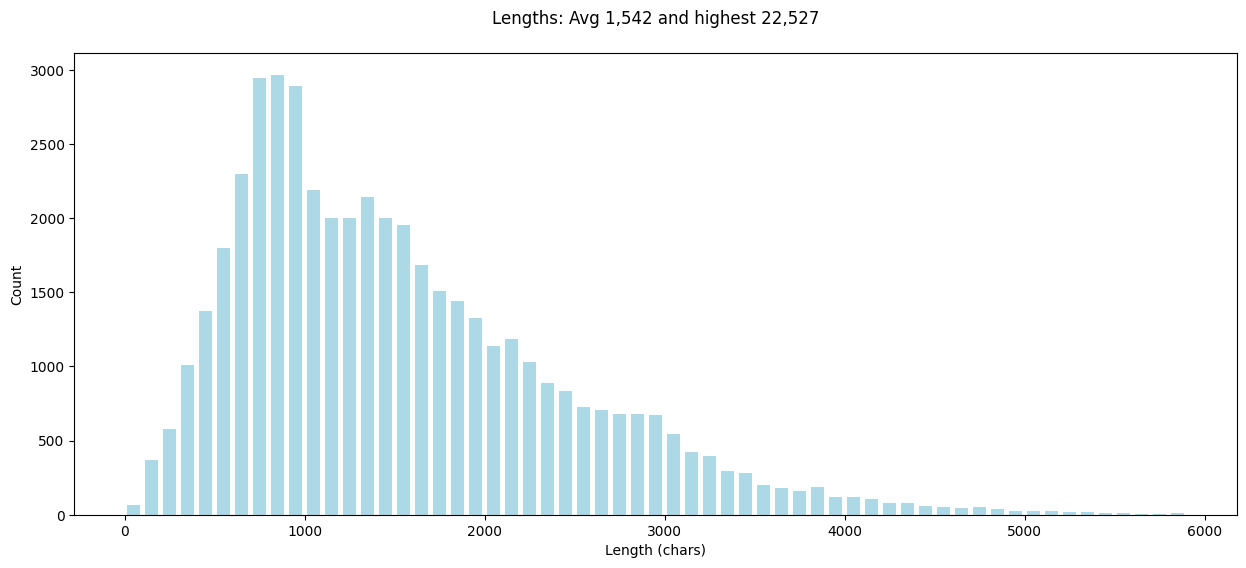

In [17]:
# Plot the distribution of lengths

plt.figure(figsize=(15, 6))
plt.title(f"Lengths: Avg {sum(lengths)/len(lengths):,.0f} and highest {max(lengths):,}\n")
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.show()

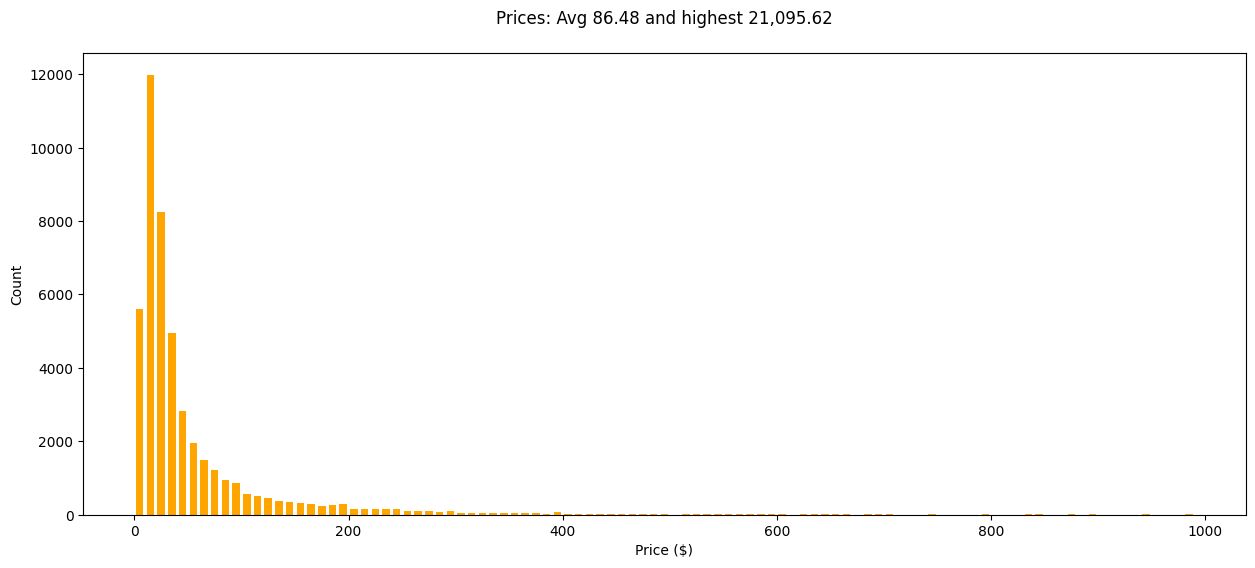

In [18]:
# Plot the distribution of prices

plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()